# Loan Application Status Prediction

Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. Independent Variables: 1. Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases 2. Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions 3. Married - This refers to applicant being in a state of matrimony 4. Dependents - This refres to persons who depends on the applicants for survival 5. Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university 6. Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer 7. Applicant Income - This refers to disposable income available for the applicant's use under State law. 8. CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law. 9. Loan_Amount - This refers to the amount of money an applicant owe at any given time. 10. Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant 11. Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them. 12. Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule. 13. Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset.

Dataset link: https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv 

In [1]:
!pip install rasterio
!pip install folium

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Data loading
Loan_application_data_url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv'
loanapp_df = pd.read_csv(Loan_application_data_url,header=None)
loanapp_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
2,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
3,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
4,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y


In [4]:
loanapp_df.shape

(615, 13)

In [5]:
new_headers  = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
loanapp_df.columns = new_headers
#loanapp_df.set_index('Loan_ID',inplace=True)
loanapp_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
2,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
3,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
4,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y


In [6]:
loanapp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            615 non-null    object
 1   Gender             602 non-null    object
 2   Married            612 non-null    object
 3   Dependents         600 non-null    object
 4   Education          615 non-null    object
 5   Self_Employed      583 non-null    object
 6   ApplicantIncome    615 non-null    object
 7   CoapplicantIncome  615 non-null    object
 8   LoanAmount         593 non-null    object
 9   Loan_Amount_Term   601 non-null    object
 10  Credit_History     565 non-null    object
 11  Property_Area      615 non-null    object
 12  Loan_Status        615 non-null    object
dtypes: object(13)
memory usage: 62.6+ KB


In [7]:
loanapp_df.shape

(615, 13)

In [8]:
loanapp_df.dtypes

Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome      object
CoapplicantIncome    object
LoanAmount           object
Loan_Amount_Term     object
Credit_History       object
Property_Area        object
Loan_Status          object
dtype: object

In [9]:
loanapp_df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,615,602,612,600,615,583,615,615,593,601,565,615,615
unique,615,3,3,5,3,3,506,288,204,11,3,4,3
top,Loan_ID,Male,Yes,0,Graduate,No,2500,0,120,360,1,Semiurban,Y
freq,1,489,398,345,480,500,9,273,20,512,475,233,422


In [10]:
loanapp_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
loanapp_df.isnull().sum()/len(loanapp_df)*100

Loan_ID              0.000000
Gender               2.113821
Married              0.487805
Dependents           2.439024
Education            0.000000
Self_Employed        5.203252
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.577236
Loan_Amount_Term     2.276423
Credit_History       8.130081
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [12]:
loanapp_df.duplicated().sum()

0

In [13]:
loanapp_df.nunique()

Loan_ID              615
Gender                 3
Married                3
Dependents             5
Education              3
Self_Employed          3
ApplicantIncome      506
CoapplicantIncome    288
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          4
Loan_Status            3
dtype: int64

In [14]:
#data Cleaning Process
loanapp_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
loanapp_df.Gender.value_counts()

Male      489
Female    112
Gender      1
Name: Gender, dtype: int64

In [16]:
loanapp_df.Married.value_counts()

Yes        398
No         213
Married      1
Name: Married, dtype: int64

In [17]:
#I'm using  mode imputation since these are likely categorical vaiables.
#Gender, Married, Dependents,  Self_Employed, Credit_History

colums_mode_filln = ['Gender','Married','Dependents','Self_Employed','Credit_History']
for i in colums_mode_filln:
  loanapp_df[i].fillna(loanapp_df[i].mode()[0],inplace=True)


In [18]:
loanapp_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
# for Loan amount and Loan amount terms I'm going to use mean imputation method .

colums_mean_filln = ['LoanAmount','Loan_Amount_Term']
for i in colums_mean_filln:
    loanapp_df[i].fillna(loanapp_df[i].mean(),inplace=True)

TypeError: can only concatenate str (not "int") to str

In [23]:
loanapp_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
loanapp_df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,615,615,615,615,615,615,615,615,593,601,615,615,615
unique,615,3,3,5,3,3,506,288,204,11,3,4,3
top,Loan_ID,Male,Yes,0,Graduate,No,2500,0,120,360,1,Semiurban,Y
freq,1,502,401,360,480,532,9,273,20,512,525,233,422


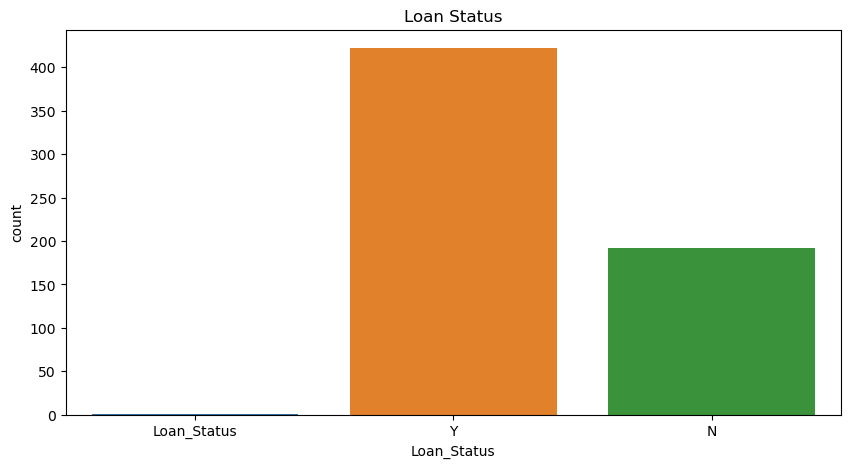

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x='Loan_Status',data=loanapp_df)
plt.title('Loan Status')
plt.show()

In [29]:
loanapp_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
2,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
3,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
4,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y


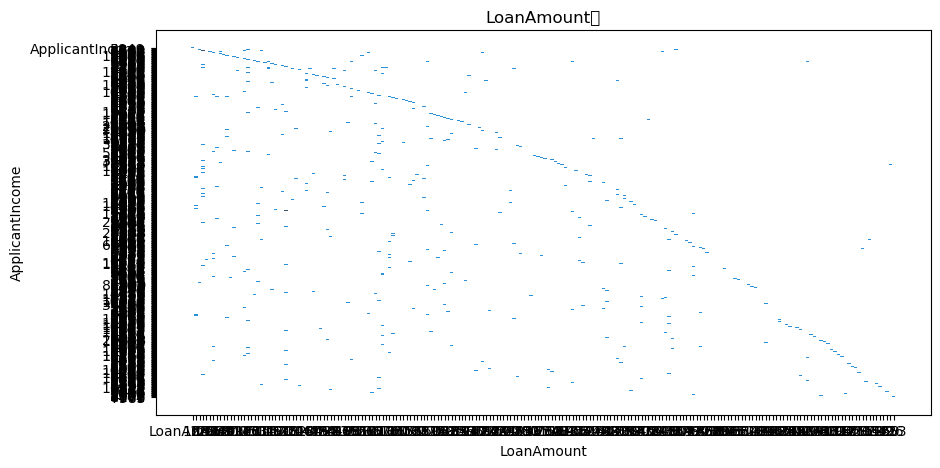

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(x='LoanAmount',y = 'ApplicantIncome', data=loanapp_df,kde = True)
plt.title('LoanAmount	')
plt.show()

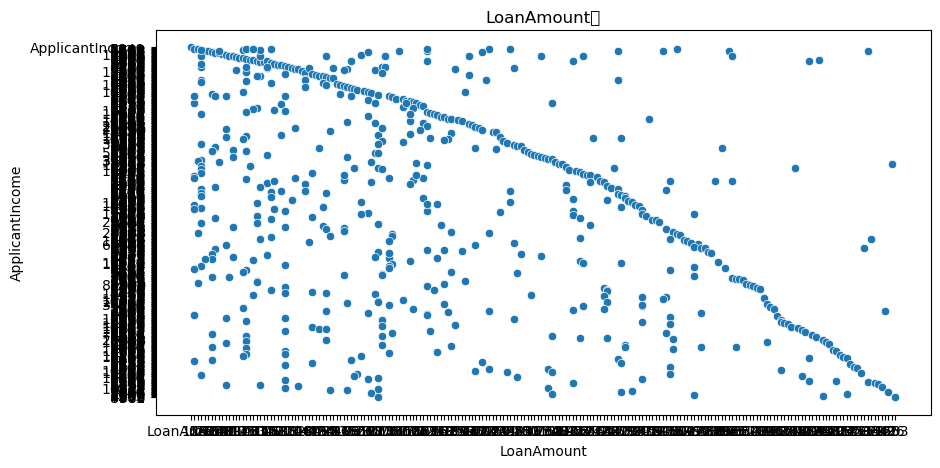

In [31]:
#using scatterplot

plt.figure(figsize=(10,5))
sns.scatterplot(x='LoanAmount',y = 'ApplicantIncome', data=loanapp_df)
plt.title('LoanAmount	')
plt.show()

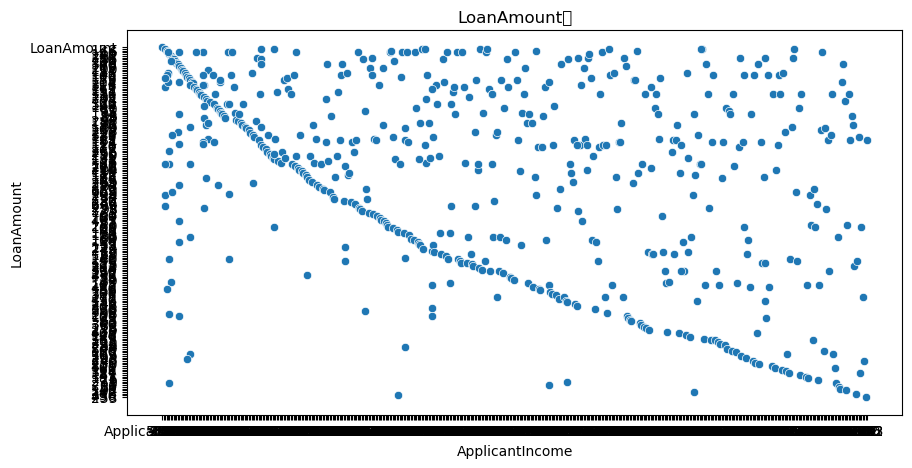

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(y='LoanAmount',x = 'ApplicantIncome', data=loanapp_df)
plt.title('LoanAmount	')
plt.show()

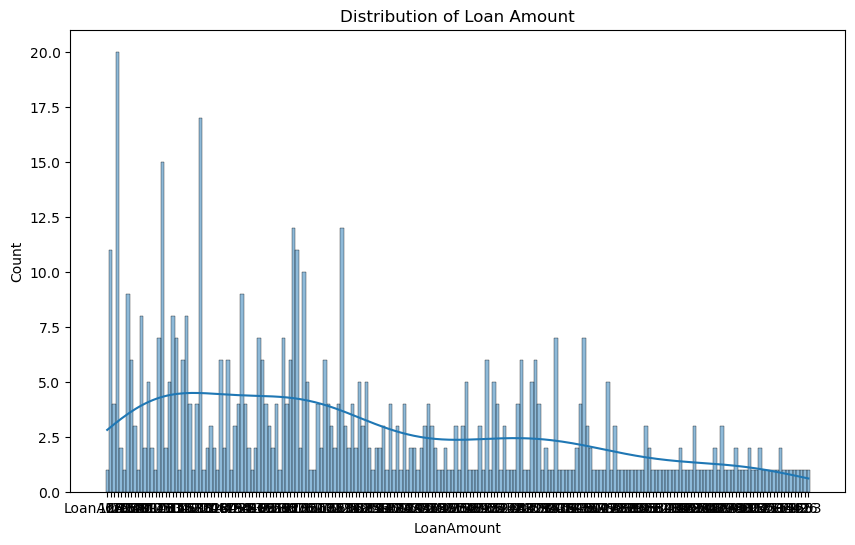

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(loanapp_df['LoanAmount'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

In [34]:
loanapp_df.dtypes

Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome      object
CoapplicantIncome    object
LoanAmount           object
Loan_Amount_Term     object
Credit_History       object
Property_Area        object
Loan_Status          object
dtype: object

In [35]:
# to check the loan status
loanapp_df['Loan_Status'].value_counts()

Y              422
N              192
Loan_Status      1
Name: Loan_Status, dtype: int64

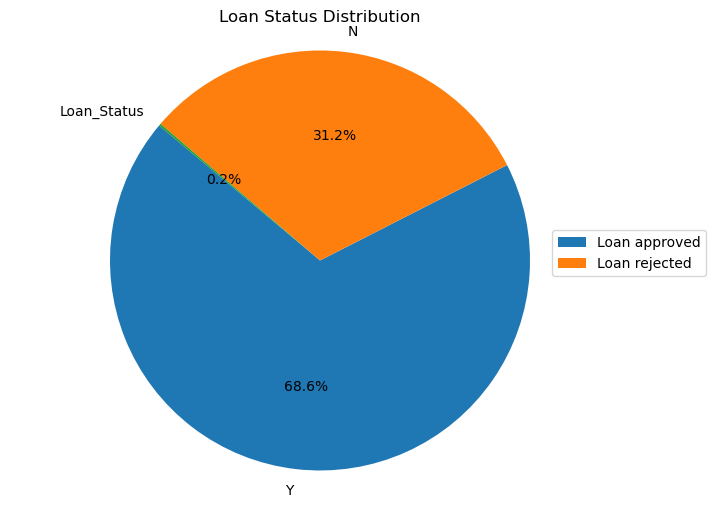

In [36]:
loan_status_count = loanapp_df['Loan_Status'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(loan_status_count, labels=loan_status_count.index, autopct='%1.1f%%', startangle=140)
plt.figlegend(['Loan approved', 'Loan rejected'], loc='center right')
plt.title('Loan Status Distribution')
plt.axis('equal')
plt.show()

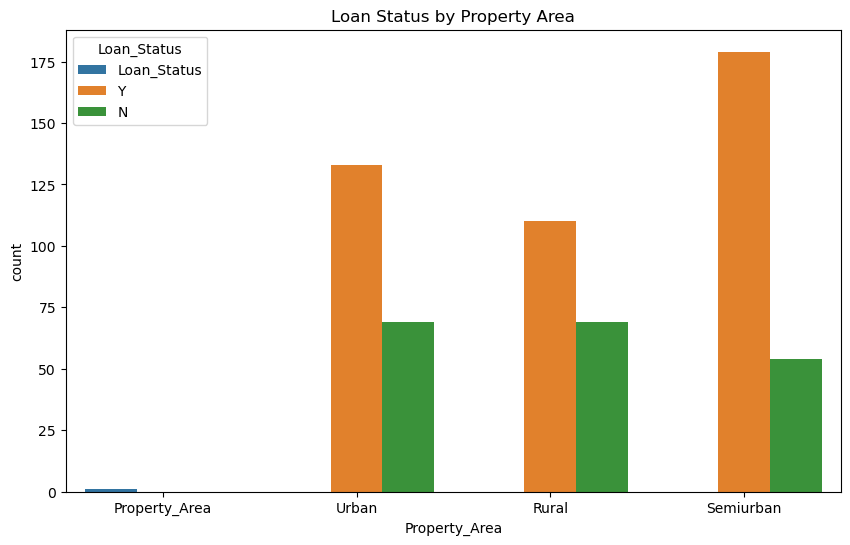

In [37]:
#Relationship between loan status and Property area
plt.figure(figsize=(10, 6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=loanapp_df)
plt.title('Loan Status by Property Area')
plt.show()

In [38]:
pd.crosstab(loanapp_df['Gender'],loanapp_df['Loan_Status'])

Loan_Status,Loan_Status,N,Y
Gender,,,
Female,0,37,75
Gender,1,0,0
Male,0,155,347


In [39]:
pd.crosstab(loanapp_df['Married'],loanapp_df['Loan_Status'])

Loan_Status,Loan_Status,N,Y
Married,,,
Married,1,0,0
No,0,79,134
Yes,0,113,288


In [40]:
pd.crosstab(loanapp_df['Property_Area'],loanapp_df['Loan_Status'])

Loan_Status,Loan_Status,N,Y
Property_Area,,,
Property_Area,1,0,0
Rural,0,69,110
Semiurban,0,54,179
Urban,0,69,133


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Property_Area'),
  Text(1, 0, 'Rural'),
  Text(2, 0, 'Semiurban'),
  Text(3, 0, 'Urban')])

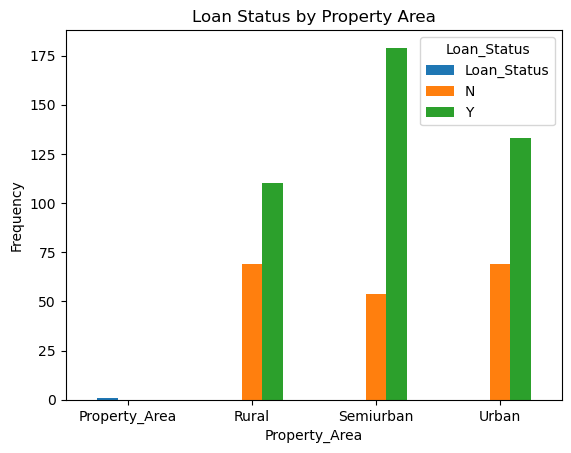

In [41]:
pd.crosstab(loanapp_df['Property_Area'],loanapp_df['Loan_Status']).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Loan Status by Property Area')
plt.xticks(rotation=0)

In [42]:
# correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(loanapp_df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Matrix')
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x600 with 0 Axes>

In [43]:
from sklearn.preprocessing import LabelEncoder
# convert string into numeric using
# to identify the categerical columns

cat_cols = loanapp_df.select_dtypes(include=['object']).columns

#applying encoder
le = LabelEncoder()
for col in cat_cols:
    loanapp_df[col] = le.fit_transform(loanapp_df[col])
#Impute missing values in the Dataframe
loanapp_df.fillna(loanapp_df.mean(), inplace=True)

In [44]:
loanapp_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,614,1,0,4,0,1,505,287,203,10,2,0,0
1,0,2,1,0,1,0,423,0,204,6,1,3,2
2,1,2,2,1,1,0,352,42,28,6,1,1,1
3,2,2,2,0,1,2,180,0,174,6,1,3,2
4,3,2,2,0,2,0,131,145,20,6,1,3,2


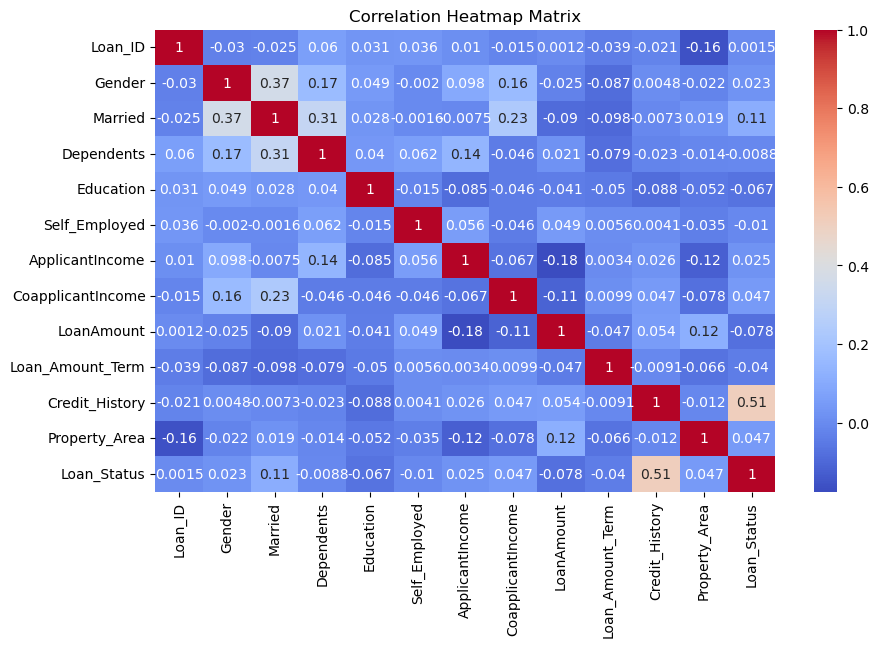

In [45]:
#Re calculating the correlation and plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(loanapp_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Matrix')
plt.show()

In [46]:
#skewness
skewness_loanapp_df = loanapp_df.skew()
skewness_loanapp_df

Loan_ID              0.000000
Gender              -1.644297
Married             -0.676491
Dependents           1.028986
Education            1.313481
Self_Employed        2.152212
ApplicantIncome      0.013887
CoapplicantIncome    0.805890
LoanAmount           0.490457
Loan_Amount_Term    -0.436069
Credit_History      -1.933499
Property_Area       -0.080489
Loan_Status         -0.843827
dtype: float64

In [47]:
# applying log transermation to Positively skewed data
loanapp_df['ApplicantIncome'] = np.log(loanapp_df['ApplicantIncome'] + 1)
loanapp_df['CoapplicantIncome'] = np.log(loanapp_df['CoapplicantIncome'] +1)
loanapp_df['LoanAmount'] = np.log(loanapp_df['LoanAmount'] +1)

In [48]:
#applying square root  transfermation to moderate
loanapp_df['Dependents'] = np.sqrt(loanapp_df['Dependents'] +1)
loanapp_df['Education'] = np.sqrt(loanapp_df['Education'] +1)
loanapp_df['Self_Employed'] = np.sqrt(loanapp_df['Self_Employed'] +1)

In [49]:
loanapp_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [50]:
# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression,RidgeClassifierCV,LassoCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score,recall_score,precision_score


#Feature selection
X = loanapp_df.drop('Loan_Status', axis=1)
y = loanapp_df['Loan_Status']

In [51]:
#Split Feature and target(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Ridge_model = RidgeClassifierCV()
Ridge_model.fit(X_train,y_train)
Ridge_model.score(X_train,y_train)

0.8089430894308943

In [52]:
y_pred = Ridge_model.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))

Accuracy: 0.8048780487804879
F1 Score: 0.6363636363636365
Recall Score: 0.4772727272727273
Precision Score: 0.9545454545454546


In [53]:
#Classifiers for fuel predections
#from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [54]:
classifiers = {
          'svc':SVC(),
          'rfc':RandomForestClassifier(),
          'knc':KNeighborsClassifier(),
          'gau':GaussianNB(),
          'dtc' : DecisionTreeClassifier(),
          'abc' : AdaBoostClassifier(),
          'grd':GradientBoostingClassifier(),
          'bagg':BaggingClassifier()
}

In [55]:
from sklearn.impute import SimpleImputer
#train AND evalate classifiers for primary fuel predection
imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

for name, classifier in classifiers.items():
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  print(f'{name} : {accuracy}')

svc : 0.6422764227642277
rfc : 0.8130081300813008
knc : 0.6504065040650406
gau : 0.8130081300813008
dtc : 0.7317073170731707
abc : 0.4878048780487805
grd : 0.7804878048780488
bagg : 0.7479674796747967


In [56]:
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(X_train,y_train)
y_pred = GaussianNB_model.predict(X_test)

Accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy : {Accuracy}')

Accuracy : 0.8130081300813008


In [57]:
import joblib
joblib.dump(GaussianNB_model,'GaussianNB_model.pkl')

['GaussianNB_model.pkl']